### Bibliotecas

In [98]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

import scienceplots
plt.style.use('science')

### Lendo Dados

In [99]:
vars = [
    'DT',
    'NPHI',
    'RES',
    'RHOB',
]
paths = []
for v in vars:
    paths.append(os.path.join(os.getcwd(),'Outputs', f'ENS_{v}_FILT.pkl'))
    paths.append(os.path.join(os.getcwd(),'Outputs', f'FEATDEC_{v}_FILT.pkl'))
paths

['c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\ENS_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\ENS_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\ENS_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\ENS_RHOB_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RHOB_FILT.pkl']

In [100]:
dfs=pd.DataFrame()
for p in paths:
    dfs = pd.concat([dfs,pd.read_pickle(p)], axis=0)
dfs

,MODEL,R2_TR,R2_TE,MAE_TR,MAE_TE,MODEL_OBJ,IN,OUT,RMSE_TR,RMSE_TE
0,SVM.SVM,0.843406,0.852442,0.065727,0.060369,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085583,0.070805
1,SVM.MLP,0.844872,0.847915,0.065208,0.061507,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085181,0.071883
2,SVM.PolyReg,0.843652,0.846300,0.065080,0.061619,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085515,0.072264
3,SVM.LinReg,0.846253,0.844257,0.064814,0.062311,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.084801,0.072742
4,SVM.XGBoost,0.860108,0.843387,0.061999,0.062693,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080890,0.072945
...,...,...,...,...,...,...,...,...,...,...
19,AdaBoostRegressor,0.889069,0.643324,0.051402,0.071803,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.059845,0.088468
20,XGBoost(DEC),0.984780,0.640055,0.016553,0.070281,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.022167,0.088872
21,AdaBoostRegressor(DEC),0.870081,0.583292,0.055865,0.080798,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.064764,0.095623
22,DecisionTree,0.960471,0.554287,0.026371,0.065496,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.035724,0.098895


In [101]:
df_results = dfs.sort_values('R2_TE', ascending=False).reset_index(drop=True)
df_results.iloc[73,:]

MODEL                                        RandomForest(DEC)
R2_TR                                                  0.96702
R2_TE                                                 0.800433
MAE_TR                                                0.029223
MAE_TE                                                0.067926
MODEL_OBJ    RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...
IN                                GR.NPHI.RHOB.PHIF.RACEHM_LOG
OUT                                                         DT
RMSE_TR                                               0.039276
RMSE_TE                                               0.082343
Name: 73, dtype: object

In [102]:
df_results.loc[73,'MODEL_OBJ'].best_score_

0.8754774736330242

In [103]:
pd.DataFrame(df_results.loc[73,'MODEL_OBJ'].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318293,0.033187,0.012080,0.015668,1,0.426484,101,17,2,75,...,0.542467,0.555168,0.497609,0.549179,0.520816,0.533044,0.542167,0.531633,0.029347,95
1,0.980740,0.227879,0.011118,0.011630,7,0.963332,16,15,18,96,...,0.813595,0.849969,0.830436,0.815883,0.853772,0.783867,0.839953,0.825598,0.022755,46
2,0.080302,0.030059,0.003896,0.006766,8,0.141897,40,3,12,26,...,0.768754,0.822641,0.795688,0.766053,0.810006,0.775997,0.800657,0.789066,0.019936,62
3,0.240330,0.093065,0.005101,0.005272,3,0.651564,70,3,15,47,...,0.758222,0.812761,0.771661,0.800851,0.803573,0.752213,0.801145,0.785649,0.024696,63
4,0.050574,0.018300,0.003140,0.006000,18,0.081988,57,17,7,18,...,0.743266,0.776970,0.739184,0.744412,0.792615,0.727113,0.746137,0.745242,0.022407,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.492101,0.187209,0.010594,0.011321,5,0.472138,129,12,17,99,...,0.809758,0.861240,0.832167,0.833297,0.852223,0.792652,0.841351,0.830338,0.021915,41
96,0.390362,0.069296,0.014494,0.016430,14,0.094426,72,15,14,98,...,0.753040,0.792369,0.745914,0.753219,0.775327,0.726283,0.760681,0.756005,0.020212,76
97,0.075945,0.012151,0.002433,0.004798,18,0.667015,69,17,11,8,...,0.806930,0.849761,0.820534,0.811155,0.846268,0.807783,0.838649,0.826790,0.022024,45
98,0.362470,0.034330,0.009609,0.012656,5,0.336824,70,9,11,58,...,0.807718,0.859633,0.825291,0.826719,0.848173,0.791608,0.836350,0.825157,0.021797,48


In [104]:
def model_class(row):
    if 'DEC' in row['MODEL']:
        model_class = 'FEAT_DEC'
    elif '.' in row['MODEL']:
        model_class = 'ENSEMBLE'
    else:
        model_class = 'BASE'
    return model_class
def estim(row):
    if 'DEC' in row['MODEL']:
        estim = row['MODEL'].split('(')[0]
    elif '.' in row['MODEL']:
        estim = row['MODEL'].split('.')[0]
    else:
        estim = row['MODEL']
    return estim
# def season_model(row):
#     estim = None
#     if '.' in row['MODEL']:
#         estim = row['MODEL'].split('.')[1]
#     return estim

In [105]:
df_results['CASE'] = df_results.apply(model_class, axis=1)
df_results['ESTIMATOR'] = df_results.apply(estim, axis=1)
# df_results['SEASONAL'] = df_results.apply(season_model, axis=1)
df_results['ESTIMATOR'].value_counts()

ESTIMATOR
PolyReg              44
SVM                  44
MLP                  44
AdaBoostRegressor    44
LinReg               44
XGBoost              44
RandomForest         44
GradientBoosting     44
ExtraTrees            8
KNN                   8
DecisionTree          8
BaggingRegressor      8
Name: count, dtype: int64

In [106]:
df_results['CASE'].unique()

array(['FEAT_DEC', 'ENSEMBLE', 'BASE'], dtype=object)

In [107]:
remove_estimators = [
    # 'PolyReg',
    # 'MLP',
    # 'SVM',
    # 'AdaBoostRegressor',
    'ExtraTrees',
    # 'LinReg',
    # 'XGBoost',
    # 'RandomForest',
    'KNN',
    'DecisionTree',
    # 'GradientBoosting',
    'BaggingRegressor',
]

df_results = df_results[~df_results['ESTIMATOR'].isin(remove_estimators)]
# df_results = df_results[~df_results['SEASONAL'].isin(remove_estimators)]


In [108]:
df_results.columns

Index(['MODEL', 'R2_TR', 'R2_TE', 'MAE_TR', 'MAE_TE', 'MODEL_OBJ', 'IN', 'OUT',
       'RMSE_TR', 'RMSE_TE', 'CASE', 'ESTIMATOR'],
      dtype='object')

Removendo duplicatas do caso base que ficou repetido

In [109]:
df_results['CASE'].value_counts()

CASE
ENSEMBLE    256
BASE         64
FEAT_DEC     32
Name: count, dtype: int64

In [110]:
df_results = df_results.drop_duplicates(subset=['MODEL','IN', 'OUT','CASE'])
df_results['CASE'].value_counts()

CASE
ENSEMBLE    256
FEAT_DEC     32
BASE         32
Name: count, dtype: int64

Reordering columns

In [111]:
new_cols = [
    'CASE',
    'MODEL',
    'ESTIMATOR',
    'R2_TR',
    'R2_TE',
    'RMSE_TR',
    'RMSE_TE',
    # 'MAE_TR',
    # 'MAE_TE',
    'MODEL_OBJ',
    'IN',
    'OUT',
]
df_results = df_results[new_cols]
df_results

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
1,ENSEMBLE,SVM.SVM,SVM,0.843406,0.852442,0.085583,0.070805,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
2,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057352,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,ENSEMBLE,MLP.MLP,MLP,0.924926,0.849657,0.049231,0.057437,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,SVM.MLP,SVM,0.844872,0.847915,0.085181,0.071883,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
...,...,...,...,...,...,...,...,...,...,...
378,ENSEMBLE,LinReg.MLP,LinReg,0.783353,0.453069,0.065633,0.098261,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
379,ENSEMBLE,LinReg.RandomForest,LinReg,0.848532,0.452852,0.054879,0.098280,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
380,ENSEMBLE,LinReg.AdaBoostRegressor,LinReg,0.797514,0.445099,0.063451,0.098974,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
381,ENSEMBLE,LinReg.SVM,LinReg,0.781750,0.440163,0.065875,0.099414,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI


Sumarização por classe

In [112]:
df_sum_class = df_results.drop_duplicates(subset=['CASE', 'OUT'])
df_sum_class = df_sum_class.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_class

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057352,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por modelo

In [113]:
df_sum_model = df_results.drop_duplicates(subset=['ESTIMATOR', 'OUT'])
df_sum_model = df_sum_model.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_model

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057352,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,ENSEMBLE,XGBoost.MLP,XGBoost,0.937864,0.794570,0.044789,0.067140,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,LinReg.AdaBoostRegressor,LinReg,0.875863,0.786024,0.063306,0.068522,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,BASE,GradientBoosting,GradientBoosting,0.988800,0.760834,0.019015,0.072443,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
6,BASE,RandomForest,RandomForest,0.975829,0.736613,0.027935,0.076023,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
7,BASE,AdaBoostRegressor,AdaBoostRegressor,0.889069,0.643324,0.059845,0.088468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
8,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
9,FEAT_DEC,MLP(DEC),MLP,0.958814,0.788846,0.032753,0.070768,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG


### Plotando

In [114]:
# dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby('OUT')
# dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby(['CASE','OUT'])
dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby(['CASE','OUT'])
dfbest = dfbest.head(5)
dfbest

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057352,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,ENSEMBLE,MLP.MLP,MLP,0.924926,0.849657,0.049231,0.057437,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,ENSEMBLE,MLP.LinReg,MLP,0.926596,0.846713,0.048681,0.057996,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,ENSEMBLE,MLP.AdaBoostRegressor,MLP,0.938606,0.845082,0.044521,0.058304,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,MLP.PolyReg,MLP,0.929074,0.844309,0.047852,0.058449,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
9,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
19,BASE,MLP,MLP,0.925120,0.806355,0.049168,0.065185,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
21,FEAT_DEC,MLP(DEC),MLP,0.942623,0.804308,0.043040,0.065529,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
24,BASE,SVM,SVM,0.883563,0.799980,0.061312,0.066250,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB


In [115]:
myPalette = ['r', '0.3', '#4169E1']

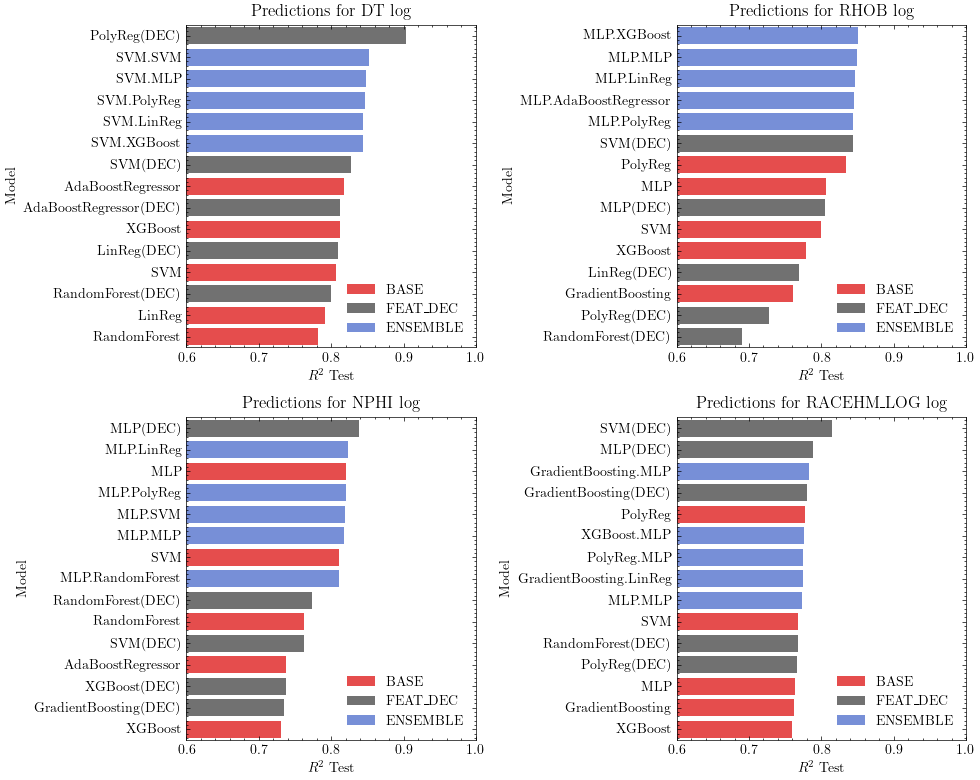

In [116]:
lim=(0.6,1)
figsize = (10,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

# fig.suptitle('')

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=dfbest[dfbest['OUT']==var], x='R2_TE', y='MODEL', hue='CASE', ax=ax[i], hue_order=dfbest['CASE'].unique()[::-1], palette=myPalette, alpha=0.8);
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Model')
    ax[i].legend(loc='lower right')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_model_5bestPerClass_short.pdf', format='pdf')

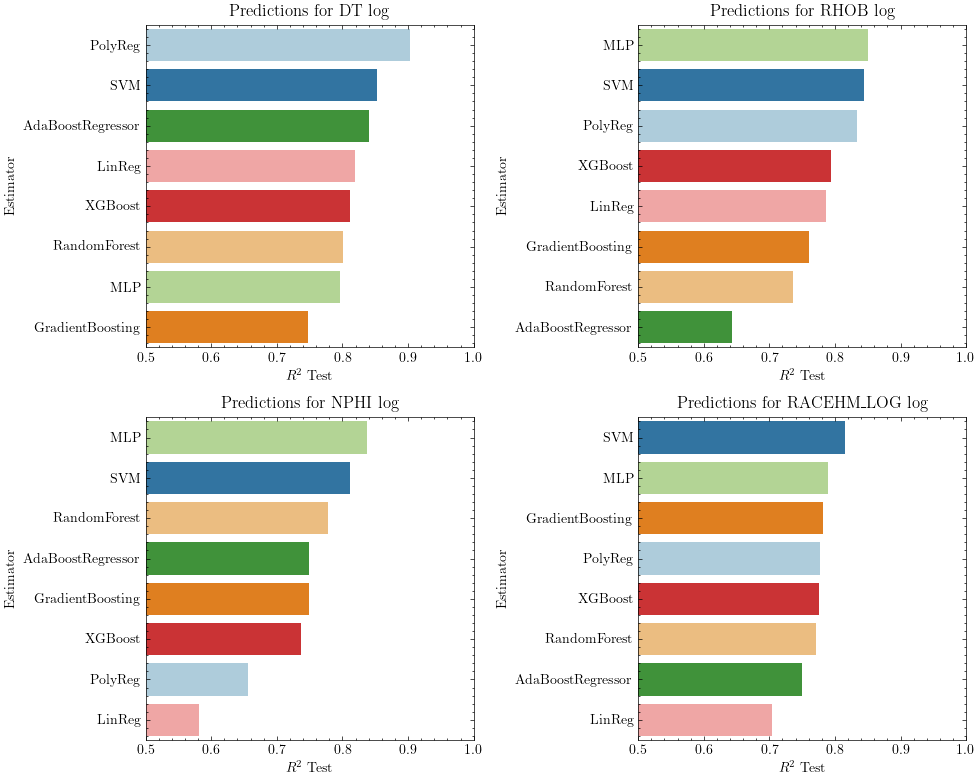

In [117]:
lim=(0.5,1)
# lim=(0.5,.91)
figsize = (10,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

for i, var in enumerate(df_results['OUT'].unique()):
    # sns.barplot(data=df_sum_model[df_sum_model['OUT']==var], x='R2_TE', y='ESTIMATOR', hue='CASE', ax=ax[i], hue_order=dfbest['CASE'].unique()[::-1], palette=myPalette, alpha=0.8);
    sns.barplot(data=df_sum_model[df_sum_model['OUT']==var], x='R2_TE', y='ESTIMATOR', hue='ESTIMATOR', hue_order=df_results['ESTIMATOR'].unique(), ax=ax[i], palette='Paired');
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Estimator')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_estimator_short.pdf', format='pdf')

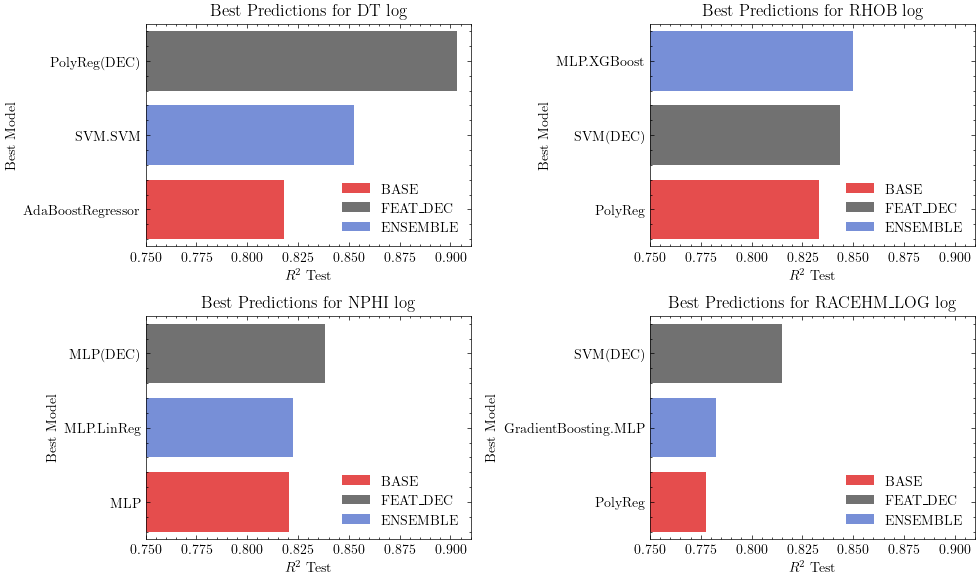

In [118]:
lim=(0.75,0.91)
figsize = (10,6)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=df_sum_class[df_sum_class['OUT']==var], x='R2_TE', y='MODEL', hue='CASE', ax=ax[i], palette=myPalette, hue_order=dfbest['CASE'].unique()[::-1], alpha=0.8);
    ax[i].set_title(f'Best Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Best Model')
    ax[i].legend(loc='lower right')
    # if i==3: ax[i].legend(loc='lower right')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_best_models_short.pdf', format='pdf')

Predições dos melhores casos

In [119]:
df = pd.read_csv('./Data/volve_preproc.csv')
df.shape

(23733, 10)

In [120]:
def decomp(X_te, period=10):
    extrapolate_trend = 5
    return seasonal_decompose(X_te, period=period, extrapolate_trend=extrapolate_trend)

In [121]:
df_results['OUT'].unique().tolist()

['DT', 'RHOB', 'NPHI', 'RACEHM_LOG']

In [122]:
df_results.columns

Index(['CASE', 'MODEL', 'ESTIMATOR', 'R2_TR', 'R2_TE', 'RMSE_TR', 'RMSE_TE',
       'MODEL_OBJ', 'IN', 'OUT'],
      dtype='object')

In [123]:
df_results.groupby(['IN', 'OUT']).head(1)[['IN','OUT']]

,IN,OUT
0,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
2,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
19,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
48,DT.GR.NPHI.RHOB.SW,RACEHM_LOG


In [124]:
data_dict = {
    'DT' :  [],
    'RHOB': [],
    'NPHI': [],
    'RACEHM_LOG': [],
}

# DT
n=3
df2 = df[::n]
df_filt = df2.dropna()
test_wells = ['15/9-F-1 B']
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['GR','NPHI','RHOB','PHIF','RACEHM_LOG']
output = ['DT']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['DT'].append(X_te)
data_dict['DT'].append(X_te_dec)
data_dict['DT'].append(X2_te)
data_dict['DT'].append(y_te)
data_dict['DT'].append(test_df['MD'])

# NPHI
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['CALI','DT','GR','RHOB','PHIF','RACEHM_LOG']
output = ['NPHI']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['NPHI'].append(X_te)
data_dict['NPHI'].append(X_te_dec)
data_dict['NPHI'].append(X2_te)
data_dict['NPHI'].append(y_te)
data_dict['NPHI'].append(test_df['MD'])


# RACEHM_LOG
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['DT','GR','NPHI','RHOB','SW']
output = ['RACEHM_LOG']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['RACEHM_LOG'].append(X_te)
data_dict['RACEHM_LOG'].append(X_te_dec)
data_dict['RACEHM_LOG'].append(X2_te)
data_dict['RACEHM_LOG'].append(y_te)
data_dict['RACEHM_LOG'].append(test_df['MD'])

# RHOB
n=4
df2 = df[::n]
df_filt = df2.dropna()
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['DT','GR','NPHI','SW','RACEHM_LOG']
output = ['RHOB']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['RHOB'].append(X_te)
data_dict['RHOB'].append(X_te_dec)
data_dict['RHOB'].append(X2_te)
data_dict['RHOB'].append(y_te)
data_dict['RHOB'].append(test_df['MD'])

PLots

In [125]:
df_sum_class

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057352,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


In [126]:
def y_pred(row):
    if row['CASE'] == 'ENSEMBLE':
        y_pred = row['MODEL_OBJ'][0].predict(data_dict[row['OUT']][1].trend) + row['MODEL_OBJ'][1].predict(data_dict[row['OUT']][1].seasonal+data_dict[row['OUT']][1].resid)
    elif row['CASE'] == 'FEAT_DEC':
        y_pred = row['MODEL_OBJ'].predict(data_dict[row['OUT']][2])
    else:
        y_pred = row['MODEL_OBJ'].predict(data_dict[row['OUT']][0])
    return y_pred.ravel()

def y_test(row):
    return data_dict[row['OUT']][3].ravel()

def train_time(row):
    search = row['MODEL_OBJ']
    if row['CASE'] == 'ENSEMBLE':
        tt = search[0].cv_results_['mean_fit_time'][search[0].best_index_] + search[1].cv_results_['mean_fit_time'][search[1].best_index_]
        # tt = np.mean(search[0].cv_results_['mean_fit_time']) + np.mean(search[1].cv_results_['mean_fit_time'])
    else:
        tt = search.cv_results_['mean_fit_time'][search.best_index_]
        # tt = np.mean(search.cv_results_['mean_fit_time'][search.best_index_])
    return tt

In [127]:
df_sum_class['y_pred'] = df_sum_class.apply(y_pred, axis=1)
df_sum_model['y_pred'] = df_sum_model.apply(y_pred, axis=1)
df_results['y_pred'] = df_results.apply(y_pred, axis=1)

df_sum_model['y_test'] = df_sum_model.apply(y_test, axis=1)
df_sum_class['y_test'] = df_sum_class.apply(y_test, axis=1)
df_results['y_test'] = df_results.apply(y_test, axis=1)

df_sum_class['train_time'] = df_sum_class.apply(train_time, axis=1)
df_sum_model['train_time'] = df_sum_model.apply(train_time, axis=1)
df_results['train_time'] = df_results.apply(train_time, axis=1)
df_sum_class[['CASE','OUT','train_time']]

,CASE,OUT,train_time
0,ENSEMBLE,RHOB,1.307467
1,FEAT_DEC,RHOB,0.025078
2,BASE,RHOB,0.002711
3,FEAT_DEC,RACEHM_LOG,0.017372
4,ENSEMBLE,RACEHM_LOG,2.820688
5,BASE,RACEHM_LOG,0.003299
6,FEAT_DEC,NPHI,1.011227
7,ENSEMBLE,NPHI,4.352604
8,BASE,NPHI,1.632815
9,FEAT_DEC,DT,0.007272


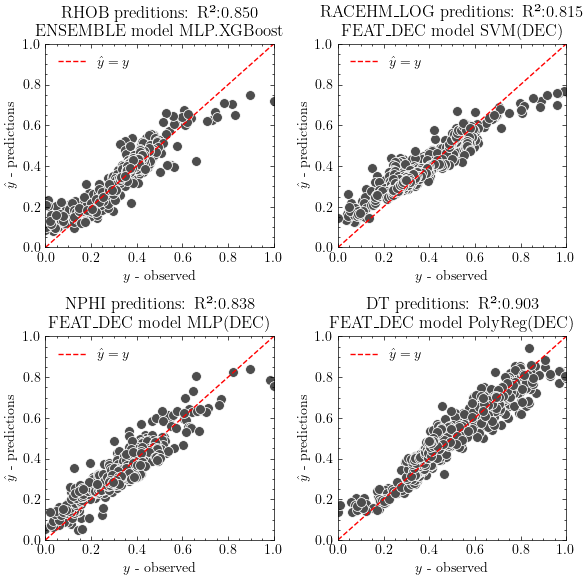

In [128]:
lim=(0,1)

fig, ax = plt.subplots(2,2, figsize=(6,6))

plt.subplot(221)
sns.scatterplot(x=df_sum_class.iloc[0,-2].ravel(), y=df_sum_class.iloc[0,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[0,'OUT']} preditions: R²:{df_sum_class.loc[0,'R2_TE']:.3f}\n {df_sum_class.loc[0,'CASE']} model {df_sum_class.loc[0,'MODEL']}")
plt.tight_layout()

plt.subplot(222)
sns.scatterplot(x=df_sum_class.iloc[3,-2].ravel(), y=df_sum_class.iloc[3,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[3,'OUT']} preditions: R²:{df_sum_class.loc[3,'R2_TE']:.3f}\n {df_sum_class.loc[3,'CASE']} model {df_sum_class.loc[3,'MODEL']}")
plt.tight_layout()

plt.subplot(223)
sns.scatterplot(x=df_sum_class.iloc[6,-2].ravel(), y=df_sum_class.iloc[6,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[6,'OUT']} preditions: R²:{df_sum_class.loc[6,'R2_TE']:.3f}\n {df_sum_class.loc[6,'CASE']} model {df_sum_class.loc[6,'MODEL']}")
plt.tight_layout()

plt.subplot(224)
sns.scatterplot(x=df_sum_class.iloc[9,-2].ravel(), y=df_sum_class.iloc[9,-3].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[9,'OUT']} preditions: R²:{df_sum_class.loc[9,'R2_TE']:.3f}\n {df_sum_class.loc[9,'CASE']} model {df_sum_class.loc[9,'MODEL']}")
plt.tight_layout()

pass;
fig.savefig(f'./Images/crossplot_science_short.pdf', format='pdf')


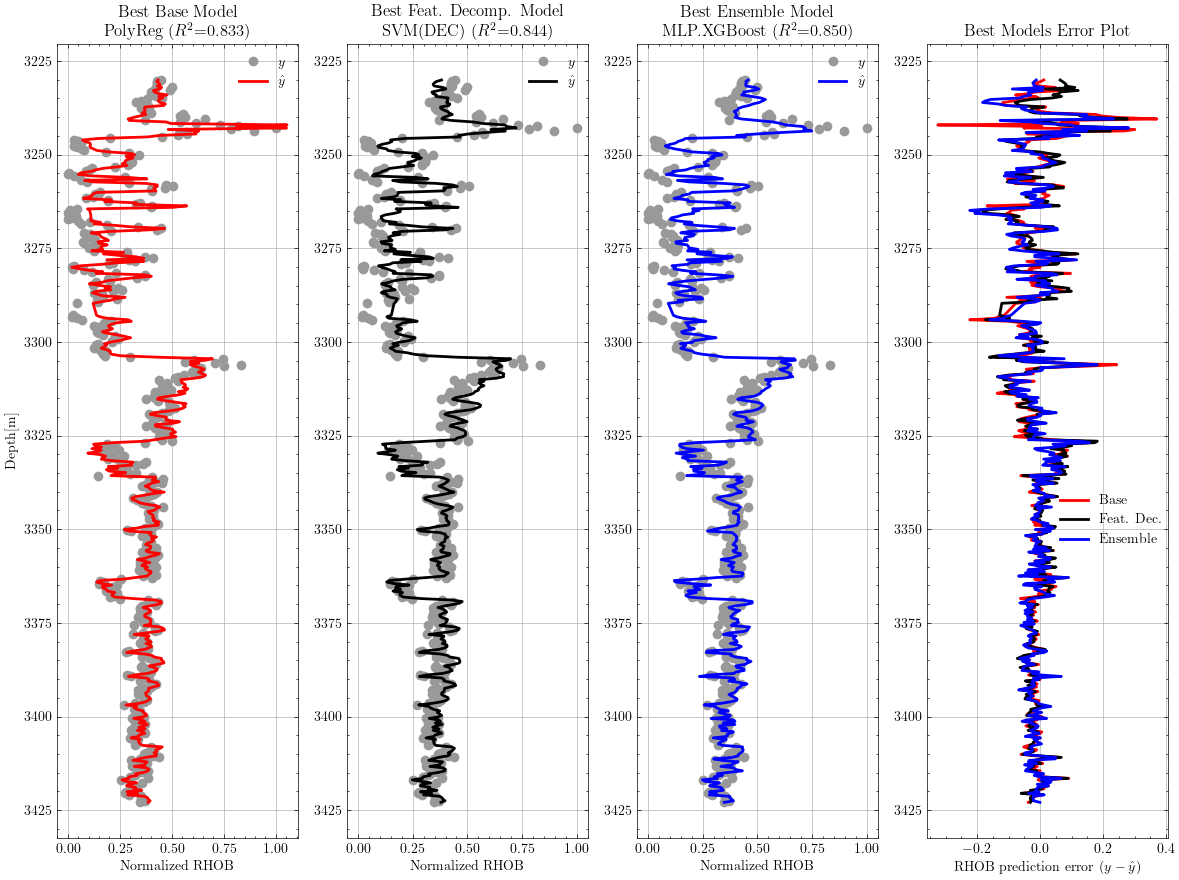

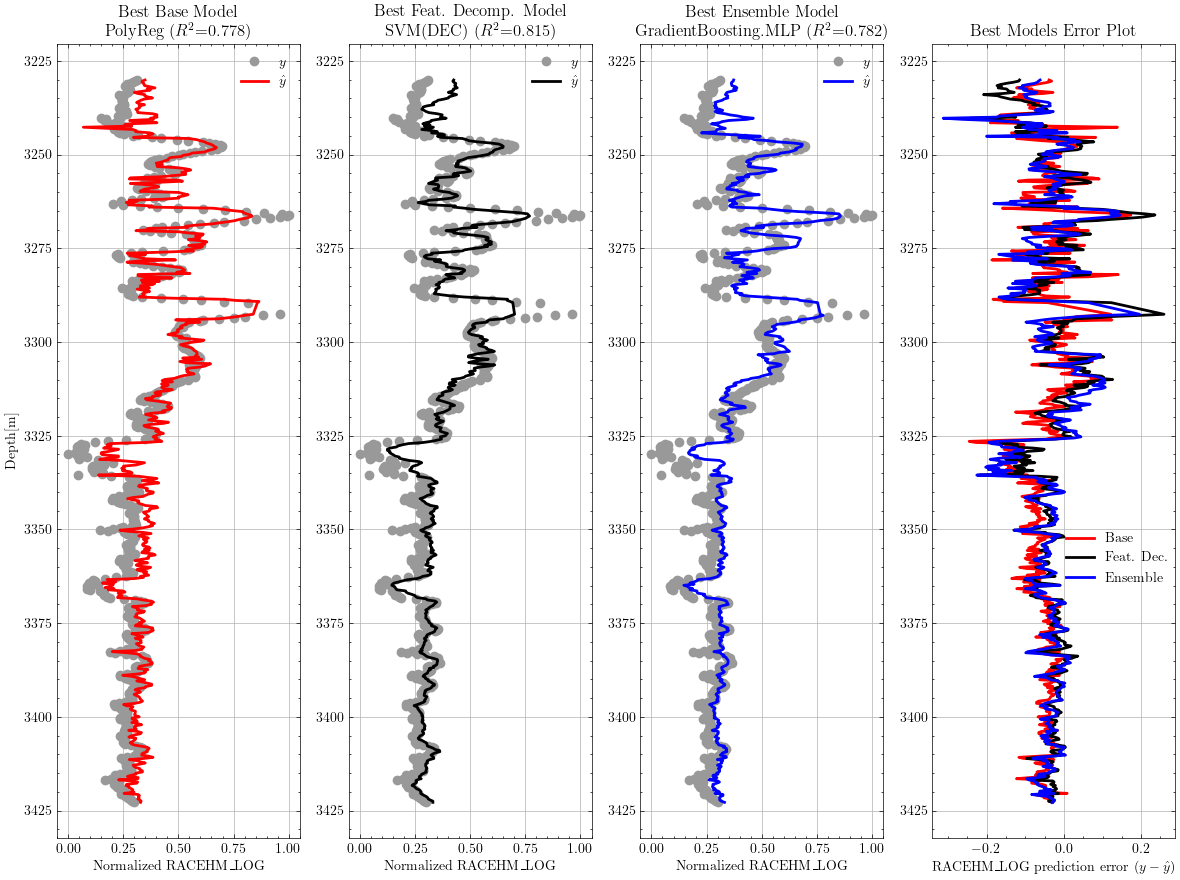

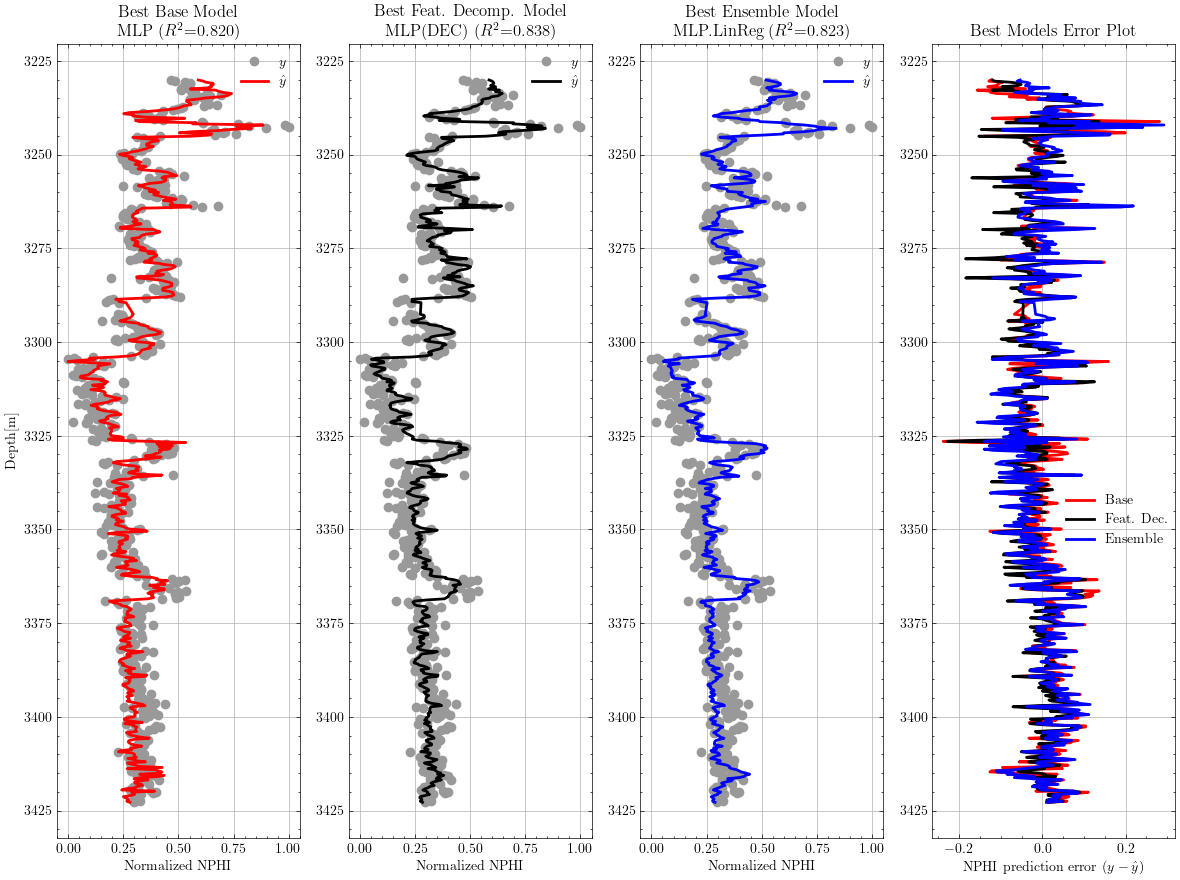

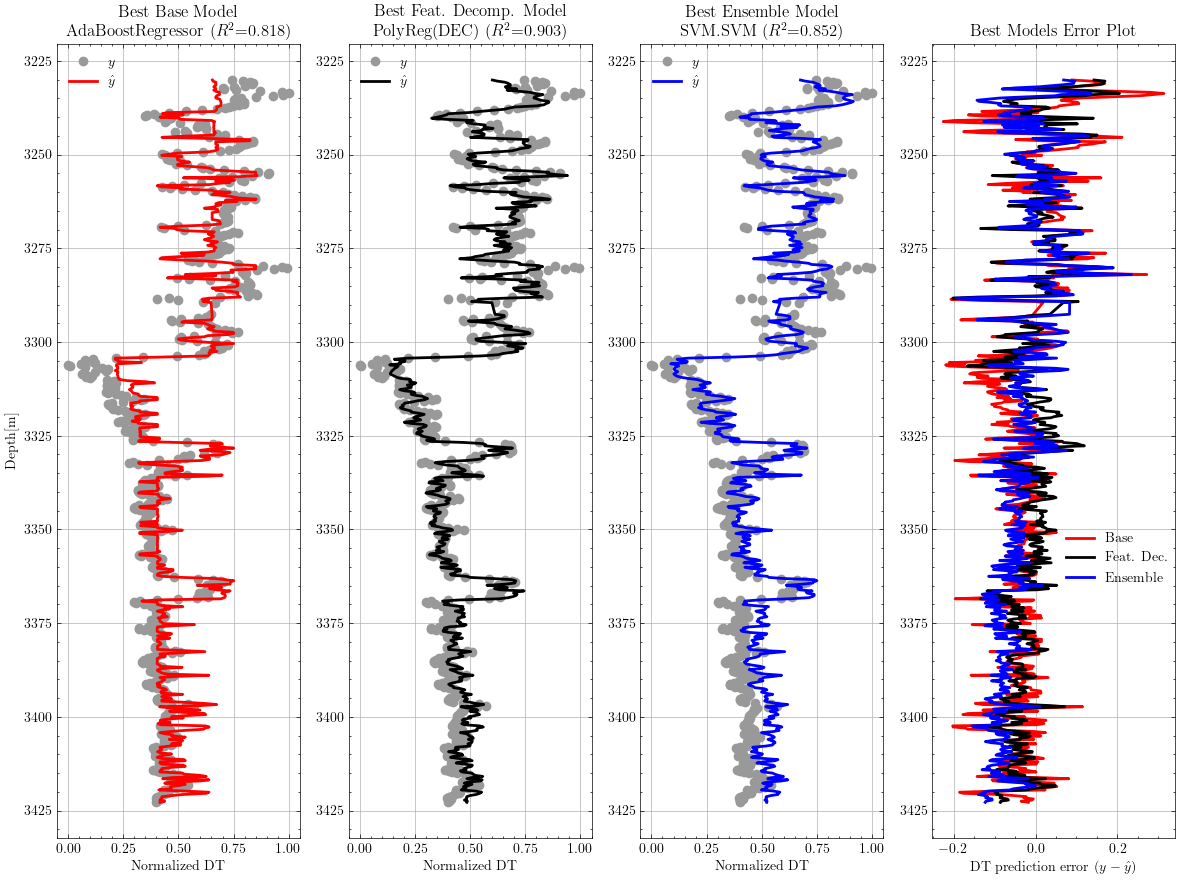

In [129]:
depth_range = [None,None]
for variable in df_sum_class['OUT'].unique():
    dftemp = df_sum_class[df_sum_class['OUT'] == variable]
    dftemp = dftemp.sort_values(['CASE']).reset_index(drop=True)

    base_row = dftemp.loc[0,:]
    featdec_row = dftemp.loc[2,:]
    ensemble_row = dftemp.loc[1,:]

    y_hat_base = base_row['y_pred']
    y_hat_featdec = featdec_row['y_pred']
    y_hat_hybrid = ensemble_row['y_pred']
    # y_hat_base = base_row['MODEL_OBJ'].predict(data_dict[variable][0])
    # y_hat_featdec = featdec_row['MODEL_OBJ'].predict(data_dict[variable][2])
    # y_hat_hybrid = ensemble_row['MODEL_OBJ'][0].predict(data_dict[variable][1].trend) + ensemble_row['MODEL_OBJ'][1].predict(data_dict[variable][1].seasonal+data_dict[variable][1].resid)

    fig, ax = plt.subplots(1,4, figsize=(12,9))

    y_real = data_dict[variable][-2].ravel()
    depth  = data_dict[variable][-1]

    plt.subplot(141)
    plt.plot(y_real, depth, 'o', color='#999999', label='$y$');
    plt.plot(y_hat_base, depth, 'r', lw=2, label='$\hat{y}$')
    plt.title(f'Best Base Model \n {base_row["MODEL"]} ($R^2$={r2_score(y_real, y_hat_base):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylabel('Depth[m]')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(depth_range)

    plt.subplot(142)
    plt.plot(y_real, depth, 'o', color='#999999', label='$y$');
    plt.plot(y_hat_featdec, depth, 'k', lw=2, label='$\hat{y}$')
    plt.gca().invert_yaxis()
    plt.title(f'Best Feat. Decomp. Model \n {featdec_row["MODEL"]} ($R^2$={r2_score(y_real, y_hat_featdec):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(depth_range)

    plt.subplot(143)
    plt.plot(y_real, depth, 'o', color='#999999', label='$y$');
    plt.plot(y_hat_hybrid,  depth, 'b', lw=2, label='$\hat{y}$')
    plt.gca().invert_yaxis()
    plt.title(f'Best Ensemble Model \n {ensemble_row["MODEL"]} ($R^2$={r2_score(y_real, y_hat_hybrid):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim(depth_range)

    plt.subplot(144)
    plt.plot(y_real - y_hat_base, depth, 'r', lw=2, label='Base')
    plt.plot(y_real - y_hat_featdec, depth, 'k', lw=2, label='Feat. Dec.')
    plt.plot(y_real - y_hat_hybrid, depth, 'b', lw=2, label='Ensemble')
    plt.gca().invert_yaxis()
    plt.title('Best Models Error Plot')
    plt.xlabel(f'{variable}' + ' prediction error ($y-\hat{y}$)')
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(0.5, 0.4))

    plt.tight_layout()
    plt.ylim(depth_range)

    fig.savefig(f'./Images/pred_{variable}_science_short_err.pdf', format='pdf')

In [130]:
filt = [
'OUT',
'CASE',
'MODEL',
'R2_TR',
'R2_TE',
'RMSE_TR',
'RMSE_TE',
'train_time',
]
df_sum_class[filt].round(5).to_clipboard()

In [131]:
idx = df_results.groupby(['OUT', 'ESTIMATOR'])['R2_TE'].idxmax()
df_best_estim = df_results.loc[idx]

df_best_estim

,CASE,MODEL,ESTIMATOR,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT,y_pred,y_test,train_time
15,ENSEMBLE,AdaBoostRegressor.SVM,AdaBoostRegressor,0.836428,0.840124,0.087469,0.073701,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6370593383449934, 0.6441645217094493, 0.665...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.540295
193,FEAT_DEC,GradientBoosting(DEC),GradientBoosting,0.983762,0.746783,0.027559,0.092753,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.5957501411822838, 0.6134204642053506, 0.634...","[0.7435146946794435, 0.7929273084479367, 0.824...",2.847176
43,ENSEMBLE,LinReg.SVM,LinReg,0.836835,0.818712,0.087360,0.078481,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6108200494135391, 0.6287381436873194, 0.660...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.003255
81,FEAT_DEC,MLP(DEC),MLP,0.865676,0.796644,0.079264,0.083121,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6523320970413273, 0.6763319585638756, 0.711...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.806939
0,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6008521766614161, 0.6233392866595034, 0.658...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.007272
73,FEAT_DEC,RandomForest(DEC),RandomForest,0.967020,0.800433,0.039276,0.082343,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6336279280431556, 0.6347463749475852, 0.639...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.767513
1,ENSEMBLE,SVM.SVM,SVM,0.843406,0.852442,0.085583,0.070805,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6748976105709862, 0.6963896173229318, 0.732...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.037380
51,BASE,XGBoost,XGBoost,0.910483,0.811805,0.064707,0.079962,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[0.6662895, 0.6642622, 0.7439971, 0.7320909, 0...","[0.7435146946794435, 0.7929273084479367, 0.824...",0.043959
188,ENSEMBLE,AdaBoostRegressor.LinReg,AdaBoostRegressor,0.810100,0.749518,0.061448,0.066497,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.4762610516582552, 0.5110866069377897, 0.543...","[0.4659057652911911, 0.4840503365525314, 0.528...",0.384118
189,ENSEMBLE,GradientBoosting.SVM,GradientBoosting,0.904447,0.749275,0.043588,0.066529,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5665097775496208, 0.5760670219298459, 0.579...","[0.4659057652911911, 0.4840503365525314, 0.528...",2.596325


(CASE
 ENSEMBLE    14
 FEAT_DEC    10
 BASE         8
 Name: count, dtype: int64,
 CASE
 ENSEMBLE    0.4375
 FEAT_DEC    0.3125
 BASE        0.2500
 Name: proportion, dtype: float64,
 0.875,
 0.75,
 0.875,
 0.5)

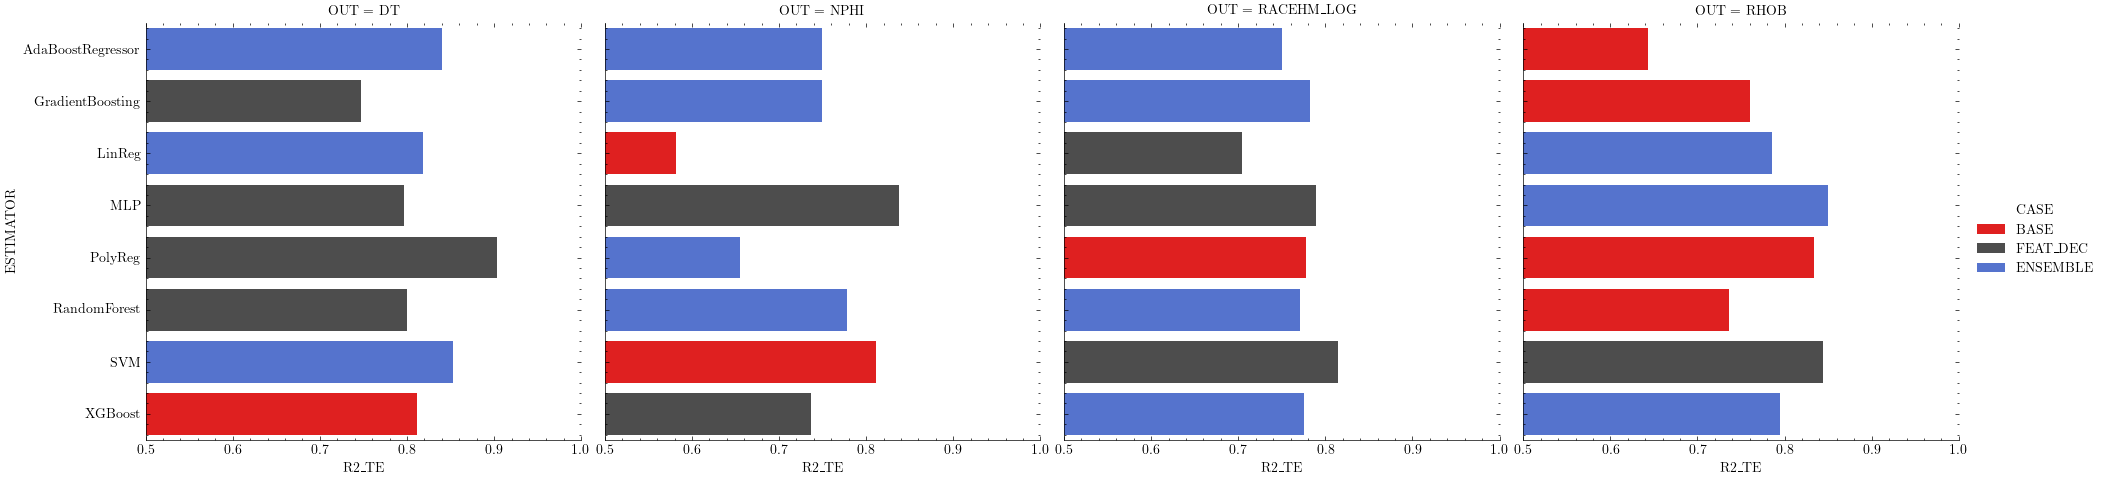

In [132]:
sns.catplot(data=df_best_estim, y='ESTIMATOR', x='R2_TE', hue='CASE', col='OUT', kind='bar', hue_order=['BASE', 'FEAT_DEC', 'ENSEMBLE'], palette=myPalette)
plt.xlim([0.5,1])
df_best_estim['CASE'].value_counts(), df_best_estim['CASE'].value_counts(normalize=True), 7/8, 6/8, 7/8, 4/8

heatmap dos vencedores

In [133]:
df_best_estim_pivot_r2 = df_best_estim.pivot(columns='OUT', values='R2_TE', index='ESTIMATOR')
df_best_estim_pivot_r2

OUT,DT,NPHI,RACEHM_LOG,RHOB
ESTIMATOR,,,,
AdaBoostRegressor,0.840124,0.749518,0.749841,0.643324
GradientBoosting,0.746783,0.749275,0.782489,0.760834
LinReg,0.818712,0.581893,0.704794,0.786024
MLP,0.796644,0.838061,0.788846,0.850101
PolyReg,0.903419,0.655412,0.777609,0.833406
RandomForest,0.800433,0.778552,0.770643,0.736613
SVM,0.852442,0.811180,0.814786,0.843549
XGBoost,0.811805,0.737099,0.775985,0.794570


In [134]:
# np.set_printoptions(precision=3, floatmode='fixed')
anr2 = df_best_estim_pivot_r2.values.round(2)
# anr2 = np.round(anr2,2)
anr2 = anr2.astype('str')
anr2[4,0] += '\nBest'
anr2[3,1] += '\nBest'
anr2[6,2] += '\nBest'
anr2[3,3] += '\nBest'
anr2

array([['0.84', '0.75', '0.75', '0.64'],
       ['0.75', '0.75', '0.78', '0.76'],
       ['0.82', '0.58', '0.7', '0.79'],
       ['0.8', '0.84\nBest', '0.79', '0.85\nBest'],
       ['0.9\nBest', '0.66', '0.78', '0.83'],
       ['0.8', '0.78', '0.77', '0.74'],
       ['0.85', '0.81', '0.81\nBest', '0.84'],
       ['0.81', '0.74', '0.78', '0.79']], dtype='<U32')

In [135]:
myPalette = ['r', '0.6', '#4189E1']

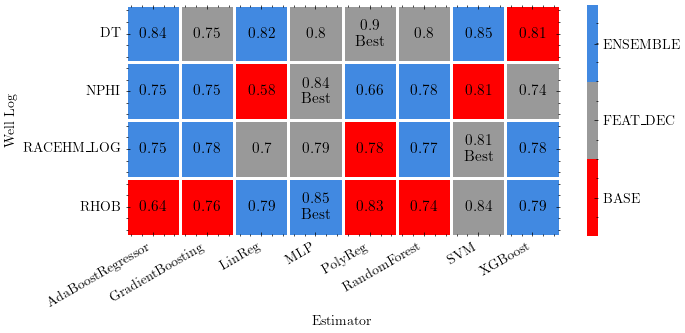

In [136]:
df_best_estim_pivot = df_best_estim.pivot(columns='OUT', values='CASE', index='ESTIMATOR')
df_best_estim_pivot.replace({j:i for i,j in enumerate(['BASE', 'FEAT_DEC', 'ENSEMBLE'])}, inplace=True)

vmin = 0.33
vmax = 1.66

fig = plt.figure(figsize=(7,3))
ax = sns.heatmap(df_best_estim_pivot.T, cmap=myPalette, linewidths=1, annot=anr2.transpose(), fmt='s', annot_kws={'fontweight':'extra bold', 'size':11, 'color':'k'})
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([vmin,1,vmax])
colorbar.set_ticklabels(['BASE', 'FEAT_DEC', 'ENSEMBLE'])

plt.ylabel('Well Log')
plt.xlabel('Estimator')
plt.xticks(rotation=30, ha='right')

fig.savefig(f'./Images/heatmap_best_estimators.pdf', format='pdf')

Crossplot Ensemble

In [137]:
def get_resid_model(row):
    if row['CASE'] == 'ENSEMBLE': resid_model = row['MODEL'].split('.')[1]
    else: resid_model = '-'
    return resid_model

DT
RHOB
NPHI
RACEHM_LOG


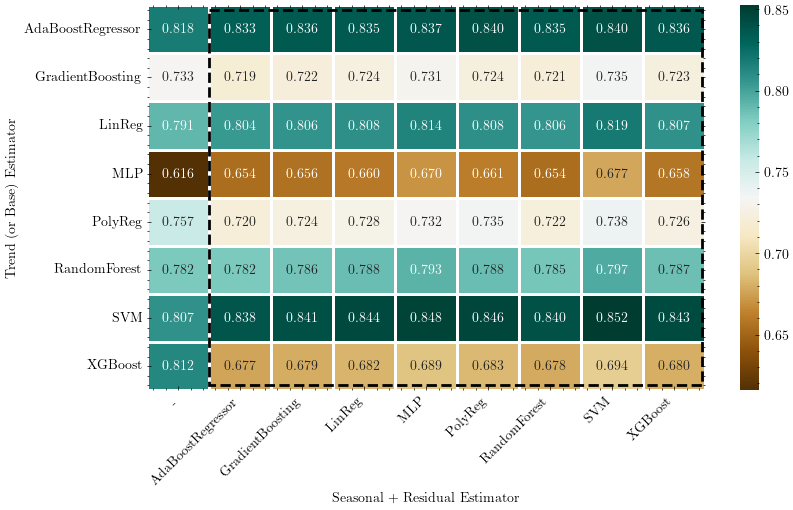

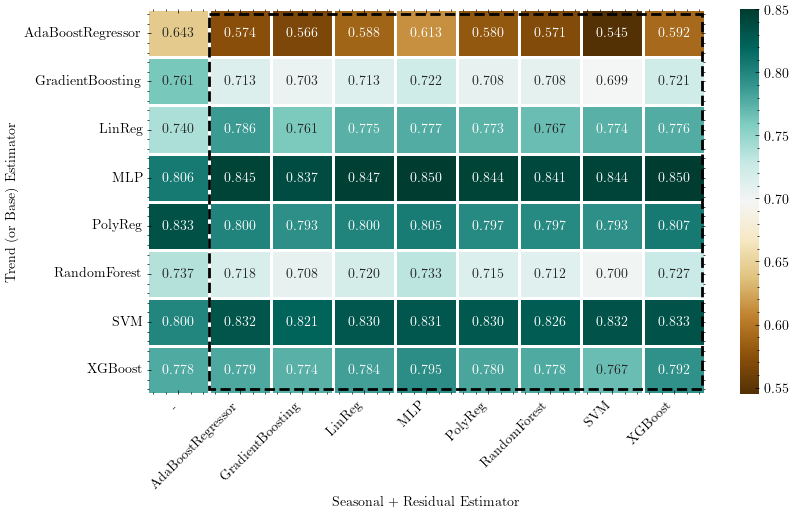

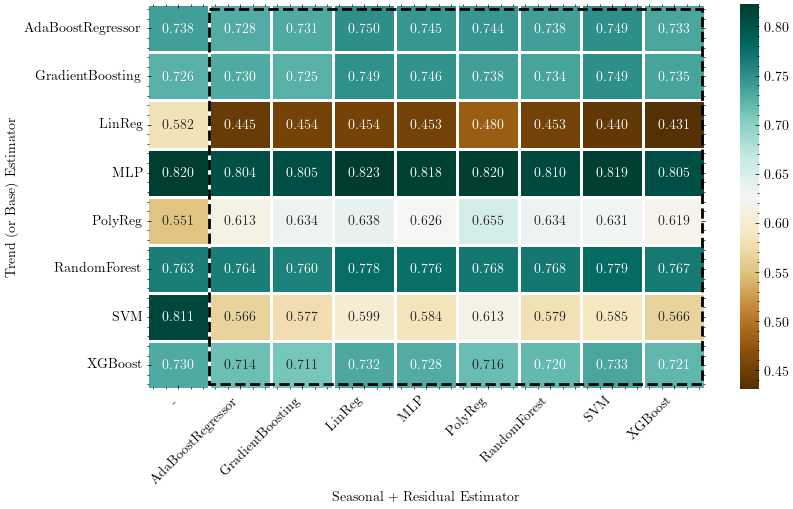

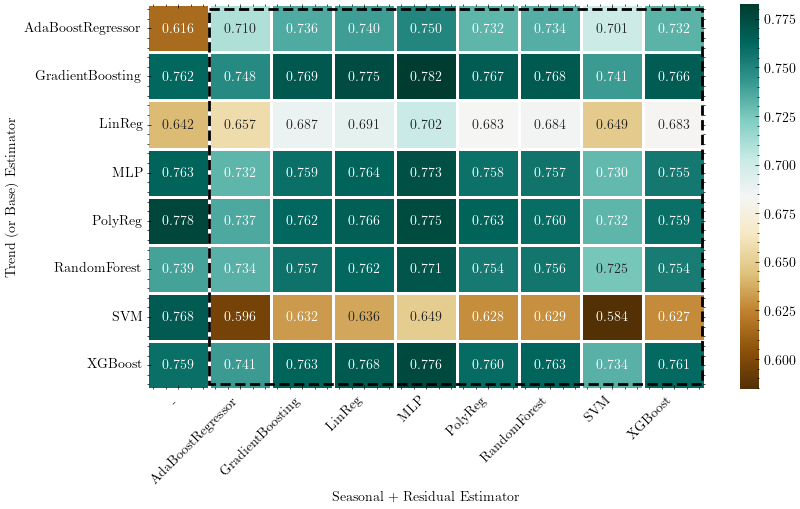

In [138]:
vars = df_results['OUT'].unique().tolist()

for var in vars:
    print (var)
    df_base = df_results[(df_results['CASE'] == 'BASE') & (df_results['OUT'] == var)]
    df_ens  = df_results[(df_results['CASE'] == 'ENSEMBLE') & (df_results['OUT'] == var)]
    df_ens = pd.concat([df_ens, df_base], axis=0)[['CASE', 'MODEL', 'ESTIMATOR', 'R2_TE']]
    df_ens['RESID_MODEL'] = df_ens.apply(get_resid_model, axis=1)
    df_ens = df_ens.pivot(columns='RESID_MODEL', values='R2_TE', index='ESTIMATOR')

    fig = plt.figure(figsize=(9,5))
    sns.heatmap(df_ens, linewidths=1, annot=True, fmt='.3f', cmap='BrBG')
    plt.ylabel('Trend (or Base) Estimator')
    plt.xlabel('Seasonal + Residual Estimator')
    plt.xticks(rotation=45, ha='right')

    fig.axes[0].add_patch(plt.Rectangle((1, 0.1), 7.95, 7.8, ls='--', lw=2, ec='k', fc='none'))
    fig.savefig(f'./Images/heatmap_ens_results_{var}.pdf', format='pdf')


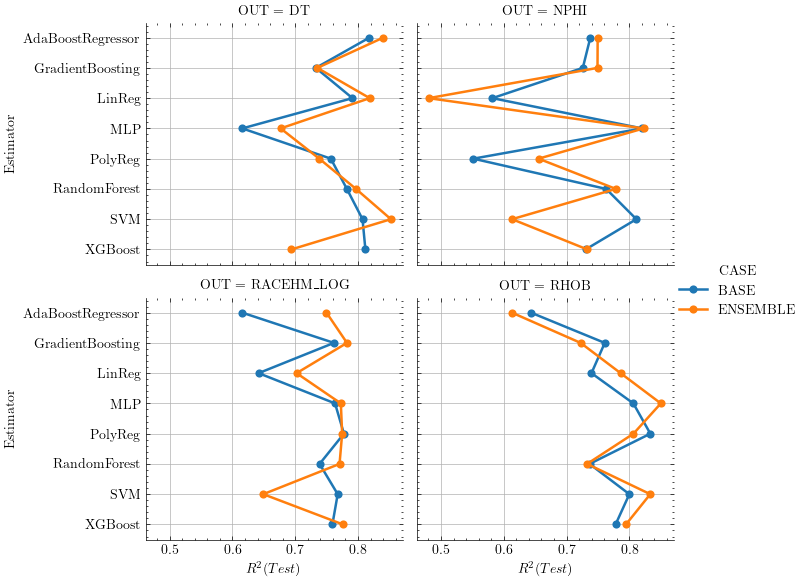

In [139]:
df_ens_all = df_results[df_results['CASE'].isin(['ENSEMBLE', 'BASE'])][['CASE', 'OUT', 'ESTIMATOR', 'R2_TE']].sort_values(by=['OUT', 'CASE'])

df_ens_all_max = df_ens_all.groupby(['OUT','ESTIMATOR','CASE' ])['R2_TE'].max().reset_index()

# g = sns.catplot(data=df_ens_all_max, x='R2_TE', y='ESTIMATOR', hue='CASE', col='OUT', kind='point', height=4, aspect=.6, palette='tab10');
g = sns.catplot(data=df_ens_all_max, x='R2_TE', y='ESTIMATOR', hue='CASE', col='OUT', kind='point', height=3, aspect=1.2, palette='tab10', col_wrap=2);
g.set_xlabels('$R^2(Test)$')
g.set_ylabels('Estimator')
for ax in g.axes.flatten(): ax.grid()

g.savefig('./Images/catplot_ens_results.pdf', format='pdf')

In [140]:
df_ens_all_max_pivot = df_ens_all_max.pivot(index=['OUT','ESTIMATOR'], columns=['CASE'], values='R2_TE').reset_index()
df_ens_all_max_pivot['IMPROVED'] = 1*(df_ens_all_max_pivot['ENSEMBLE'] > df_ens_all_max_pivot['BASE'])
# df_ens_all_max_pivot.groupby(['OUT']).sum()
df_ens_all_max_pivot


CASE,OUT,ESTIMATOR,BASE,ENSEMBLE,IMPROVED
0,DT,AdaBoostRegressor,0.818034,0.840124,1
1,DT,GradientBoosting,0.732892,0.735235,1
2,DT,LinReg,0.791211,0.818712,1
3,DT,MLP,0.615783,0.676808,1
4,DT,PolyReg,0.756749,0.738382,0
5,DT,RandomForest,0.782344,0.796782,1
6,DT,SVM,0.807220,0.852442,1
7,DT,XGBoost,0.811805,0.693906,0
8,NPHI,AdaBoostRegressor,0.737848,0.749518,1
9,NPHI,GradientBoosting,0.725867,0.749275,1


Avaliação do FEATDEC

In [265]:
df_dec = df_results[df_results['CASE'].isin(['FEAT_DEC', 'BASE'])][['CASE', 'OUT', 'ESTIMATOR', 'R2_TE']].sort_values(by=['ESTIMATOR', 'OUT', 'CASE'])
df_dec.describe()

,R2_TE
count,64.000000
mean,0.744097
std,0.080220
min,0.493420
25%,0.729656
50%,0.762635
75%,0.800094
max,0.903419


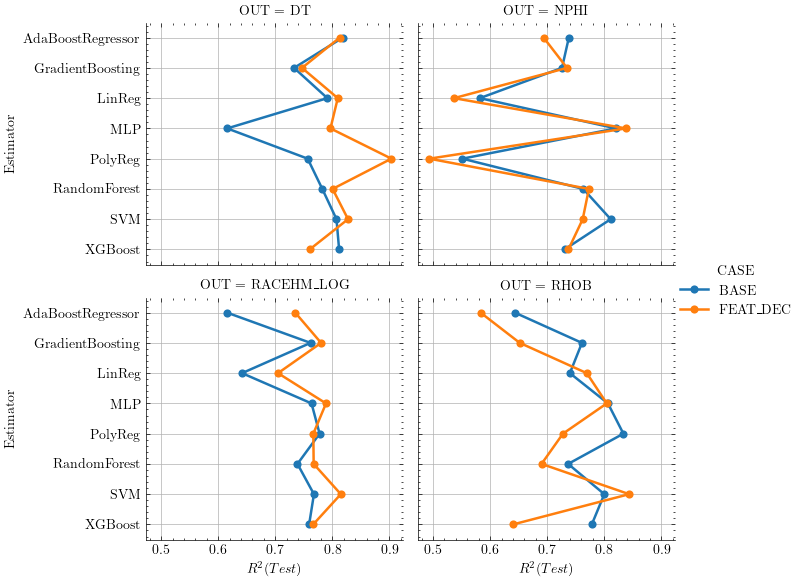

In [224]:
# g = sns.catplot(data=df_dec, x='R2_TE', y='ESTIMATOR', hue='CASE', col='OUT', kind='point', height=4, aspect=.6, palette='tab10');
g = sns.catplot(data=df_dec, x='R2_TE', y='ESTIMATOR', hue='CASE', col='OUT', kind='point', height=3, aspect=1.2, palette='tab10', col_wrap=2);
g.set_xlabels('$R^2(Test)$')
g.set_ylabels('Estimator')
# g.despine()
for ax in g.axes.flatten(): ax.grid()

g.savefig('./Images/catplot_featdec_results.pdf', format='pdf')


Estudo tempos totais de treino RSCV

In [143]:
def train_time_total(row):
    search = row['MODEL_OBJ']
    if row['CASE'] == 'ENSEMBLE':
        tt = np.sum(search[0].cv_results_['mean_fit_time']) + np.sum(search[1].cv_results_['mean_fit_time'])
    else:
        tt = np.sum(search.cv_results_['mean_fit_time'])
    return tt

In [144]:
df_results['train_time_total'] = df_results.apply(train_time_total, axis=1)

In [145]:
df_results.groupby(['CASE'])['train_time_total'].mean()

# df_results.groupby(['OUT','CASE'])['train_time_total'].mean()

CASE
BASE        26.535485
ENSEMBLE    59.772330
FEAT_DEC    34.844608
Name: train_time_total, dtype: float64

In [146]:
df_results['CASE'].value_counts()

CASE
ENSEMBLE    256
FEAT_DEC     32
BASE         32
Name: count, dtype: int64

### revisao

featdec


In [268]:
df_cv_feat = df_results[~df_results.CASE.isin(['ENSEMBLE'])]
df_cv_feat = df_cv_feat.drop(columns=['MODEL', 'R2_TR', 'RMSE_TR', 'RMSE_TE', 'IN', 'y_pred', 'y_test', 'train_time', 'train_time_total'], axis=1);


In [269]:
cvr_dict_feat = {
    'CASE':         [],
    'ESTIMATOR':    [],
    'R2_TE':        [],
    'OUT':          [],
    'R2_SPLIT':     [],
}

for index,row in df_cv_feat.iterrows():
    cvr = row['MODEL_OBJ'].cv_results_
    best_iter_index = np.where(cvr['rank_test_score']==1)[0][0]

    for k,v in cvr.items():
        if 'split' in k and 'test_score' in k:
            cvr_dict_feat['CASE'].append(row['CASE'])
            cvr_dict_feat['ESTIMATOR'].append(row['ESTIMATOR'])
            cvr_dict_feat['R2_TE'].append(row['R2_TE'])
            cvr_dict_feat['OUT'].append(row['OUT'])
            cvr_dict_feat['R2_SPLIT'].append(cvr[k][best_iter_index])

df_cv_results_feat = pd.DataFrame(cvr_dict_feat).sort_values(['ESTIMATOR','CASE'])

In [257]:
df_cv_results_feat[(df_cv_results_feat['OUT']=='DT') & (df_cv_results_feat['ESTIMATOR']=='MLP')]

,CASE,ESTIMATOR,R2_TE,OUT,R2_SPLIT
2850,BASE,MLP,0.615783,DT,0.856124
2851,BASE,MLP,0.615783,DT,0.831952
2852,BASE,MLP,0.615783,DT,0.828229
2853,BASE,MLP,0.615783,DT,0.841099
2854,BASE,MLP,0.615783,DT,0.849482
...,...,...,...,...,...
895,FEAT_DEC,MLP,0.796644,DT,0.840853
896,FEAT_DEC,MLP,0.796644,DT,0.824043
897,FEAT_DEC,MLP,0.796644,DT,0.876439
898,FEAT_DEC,MLP,0.796644,DT,0.843082


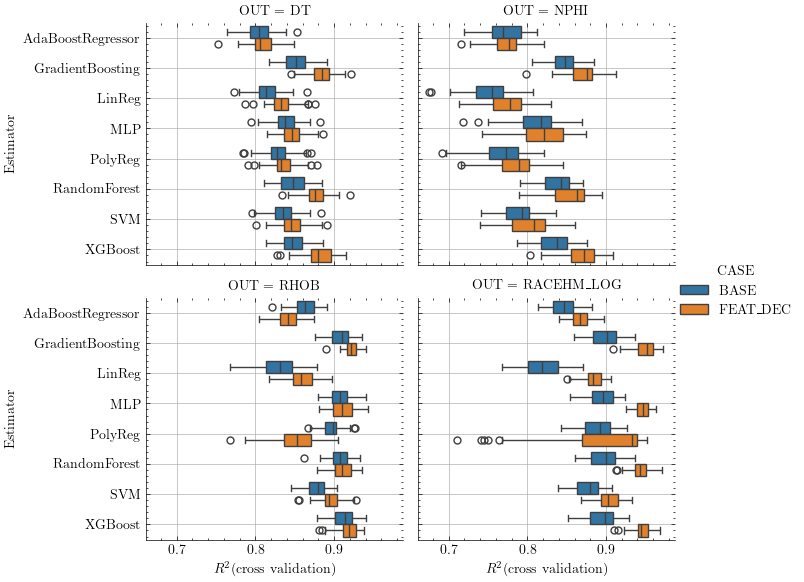

In [326]:
g = sns.catplot(data=df_cv_results_feat, x='R2_SPLIT', y='ESTIMATOR', hue='CASE', col='OUT', kind='box', height=3, aspect=1.2, palette='tab10', col_wrap=2);
g.set_xlabels('$R^2$(cross validation)')
g.set_ylabels('Estimator')
# g.despine()
for ax in g.axes.flatten(): ax.grid()

# g.savefig('./Images/catplot_featdec_results.pdf', format='pdf')


ensembles

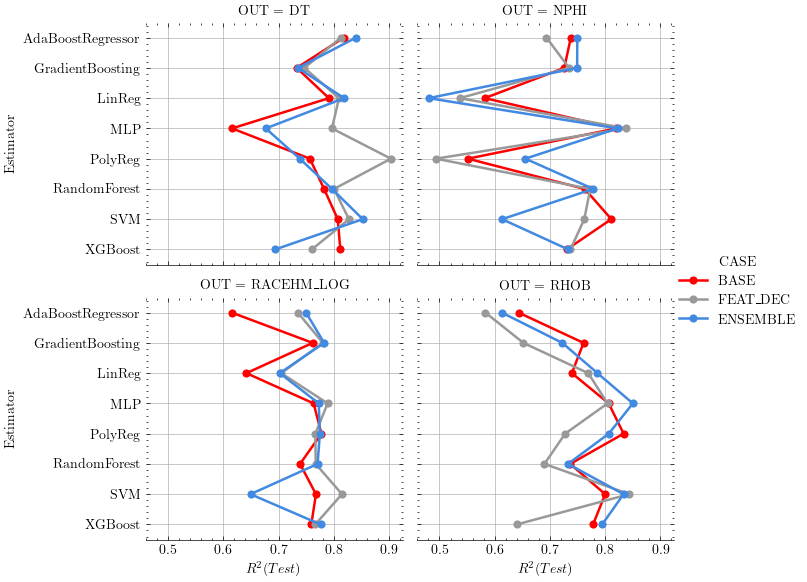

In [329]:
df_res_final = pd.concat([df_ens_all_max,df_dec[df_dec['CASE']=='FEAT_DEC']])
df_res_final


# g = sns.catplot(data=df_dec, x='R2_TE', y='ESTIMATOR', hue='CASE', col='OUT', kind='point', height=4, aspect=.6, palette='tab10');
g = sns.catplot(data=df_res_final, x='R2_TE', y='ESTIMATOR', hue='CASE', col='OUT', kind='point', height=3, aspect=1.2, col_wrap=2, palette=myPalette, hue_order = ['BASE', 'FEAT_DEC', 'ENSEMBLE']);
g.set_xlabels('$R^2(Test)$')
g.set_ylabels('Estimator')
g.despine(left=True)
for ax in g.axes.flatten():
    # ax.set_xlim([0.4,0.9])
    ax.grid()
